In [49]:
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set()
import numpy as np 
import pandas as pd
import seaborn as sns
%matplotlib inline

In [47]:
from sklearn.datasets import load_boston

In [87]:
df=load_boston()

In [88]:
dataset=pd.DataFrame(df.data)
dataset.columns=df.feature_names

In [89]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [90]:
X=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]

In [91]:
y

0      4.98
1      9.14
2      4.03
3      2.94
4      5.33
       ... 
501    9.67
502    9.08
503    5.64
504    6.48
505    7.88
Name: LSTAT, Length: 506, dtype: float64

In [85]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90
...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45


In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.33,random_state=41)

In [93]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()

In [100]:
from sklearn.model_selection import cross_val_score
mse=cross_val_score(lin_reg,X_train,y_train,scoring='neg_mean_squared_error',cv=5)
print(mse)


[-13.27939793 -24.91249878 -20.65446206 -36.6839687  -37.98096788]


In [101]:
lin_reg.fit(X,y)

LinearRegression()

In [102]:
predictions=lin_reg.predict(X_test)

In [103]:
lin_reg.coef_

array([ 9.89555733e-02,  1.43814864e-02,  9.23862966e-02, -1.00967491e+00,
        5.17942939e+00, -4.40813712e+00,  8.88490368e-02,  1.51203756e-01,
        4.66394573e-02, -1.13616392e-03,  1.17150285e-01, -8.21168411e-03])

In [104]:
lin_reg.intercept_

30.122168653643044

<AxesSubplot:ylabel='LSTAT'>

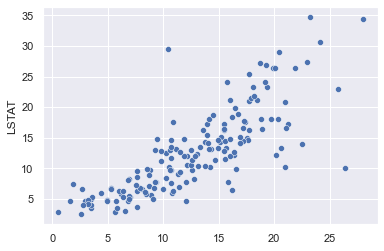

In [105]:
sns.scatterplot(x=predictions,y=y_test)

In [106]:
from sklearn import metrics

In [107]:
MAE= metrics.mean_absolute_error(y_test,predictions)
MSE= metrics.mean_squared_error(y_test,predictions)
RMSE=np.sqrt(metrics.mean_squared_error(y_test,predictions))
print("MAE: {}\nMSE: {}\nRMSE: {}".format(MAE,MSE,RMSE))

MAE: 2.9982082049319256
MSE: 17.015100489064906
RMSE: 4.124936422427006


In [108]:
#Ridge Regression
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge=Ridge()

In [110]:

params=[['alpha']:[1e-15,1e-10,1e-8,1e-5,1e-3,1e-2,1e-1,0,1,2,3,4,5,10,20,50,100]]

SyntaxError: invalid syntax (Temp/ipykernel_19652/1282051005.py, line 1)

In [111]:

params={'alpha':[1e-15,1e-10,1e-8,1e-5,1e-3,1e-2,1e-1,0,1,2,3,4,5,10,20,50,100]} 
ridge_regressor=GridSearchCV(ridge,params,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X_train,y_train)


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.001, 0.01, 0.1,
                                   0, 1, 2, 3, 4, 5, 10, 20, 50, 100]},
             scoring='neg_mean_squared_error')

In [112]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 0.1}
-20.440478825068034
